In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mnist=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_train,X_test=X_train/255.0,X_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

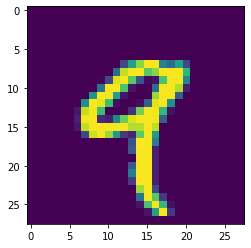

In [6]:
plt.imshow(X_train[4])

In [7]:
Y_train.shape

(60000,)

In [8]:
Y_train[4]

9

In [0]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dropout(0.2),tf.keras.layers.Dense(10,activation='softmax')])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
model.compile(loss=loss_fn,optimizer='adam',metrics=['accuracy'])

In [24]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5851 - accuracy: 0.8938
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5244 - accuracy: 0.9423
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5097 - accuracy: 0.9555
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5023 - accuracy: 0.9623
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4969 - accuracy: 0.9670


In [25]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4930 - accuracy: 0.9694


[1.49301016330719, 0.9693999886512756]

5


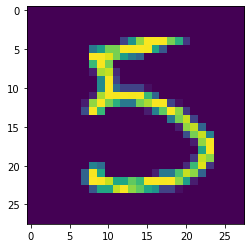

In [38]:
num=15
print(model.predict(np.array([X_test[num]])).argmax())
plt.imshow(X_test[num])

In [0]:
import matplotlib.image as mpimg
img=mpimg.imread('https://www.stickpng.com/assets/images/58c57fee09e8bc1b42c77938.png')

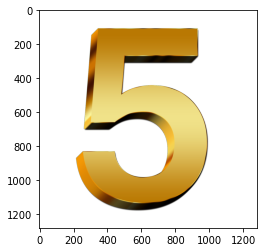

In [65]:
img.shape
plt.imshow(img)

In [0]:
img=tf.image.resize(img,size=np.array([28,28]))

In [0]:
img=img[:,:,0]

5


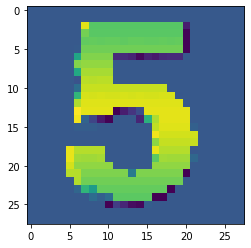

In [68]:
print(model.predict(np.array([img])).argmax())
plt.imshow(img)